In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1753 		 0.24 		 0.15 |
| 1382 		 0.02 		 0.31 |
| 2147 		 0.34 		 0.31 |
| 2518 		 0.45 		 0.06 |
| 1570 		 0.14 		 0.19 |
| 1810 		 0.13 		 0.17 |
| 1395 		 0.02 		 0.01 |
| 4725 		 0.2 		 0.07 |
| 6396 		 0.22 		 0.24 |
| 1316 		 0.05 		 0.11 |
| 1439 		 0.25 		 0.22 |
| 462 		 0.33 		 0.26 |
| 97 		 0.43 		 0.24 |
| 3189 		 0.31 		 0.2 |
| 155 		 0.29 		 0.19 |
| 2974 		 0.48 		 0.17 |
| 1960 		 0.36 		 0.18 |
| 1203 		 0.23 		 0.1 |
| 6259 		 0.21 		 0.12 |
-------------------------------------
The s.d. of M is: 1545.0
The s.d. of E is: 0.13
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 2181
The mean of E is: 0.2
The mean of I is: 0.21
-------------------------------------


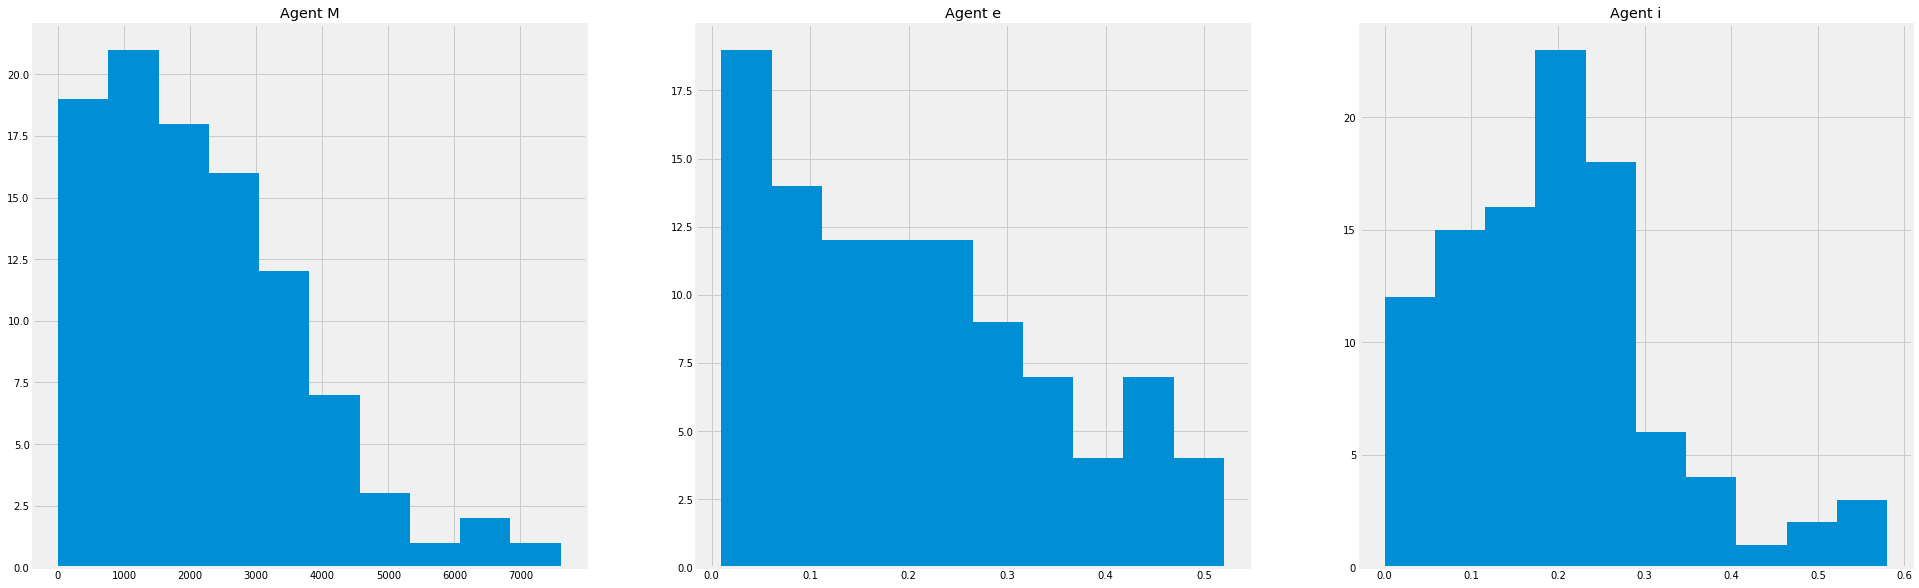

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 2000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)

Tournament has started...
Tournament has ended. The simulation took 15 minutes.
    S.D.  Counts
0    0.5     204
1    0.6     192
2    0.7     175
3    0.8     168
4    0.9     179
5    1.0     169
6    1.1     169
7    1.2     164
8    1.3     147
9    1.4     139
10   1.5      96
11   1.6      88
12   1.7      59
13   1.8      44
14   1.9      27
15   2.0      16
16   2.1       7
17   2.2       9
18   2.3       6
19   2.4       6
20   2.5       6
21   2.6       4
22   2.7       0
23   2.8       0
24   2.9       0
25   3.0       0


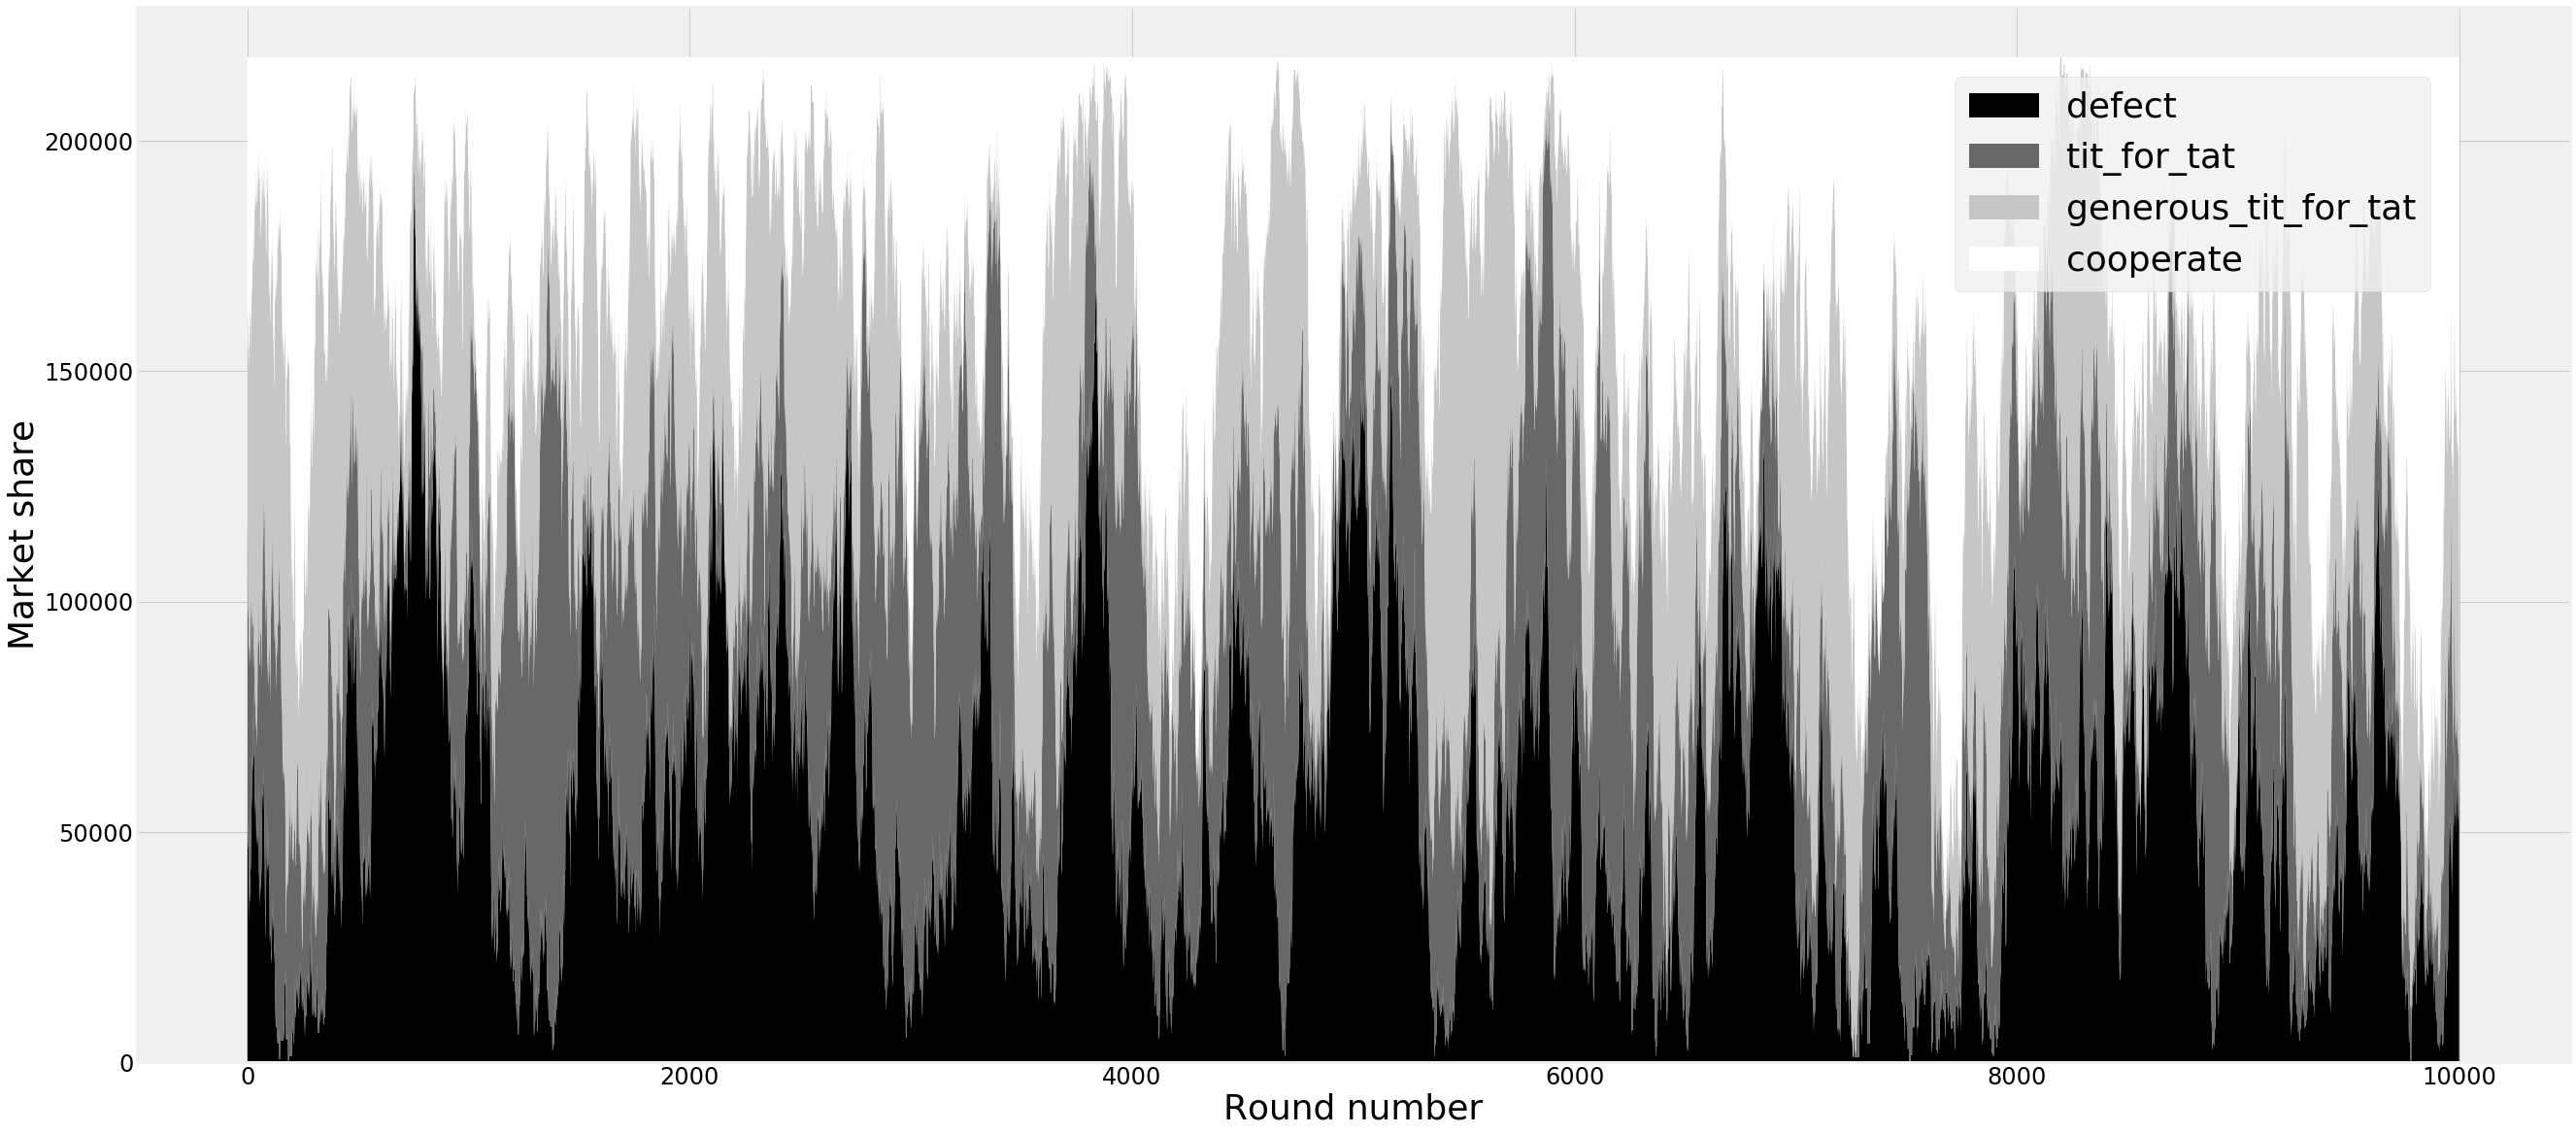

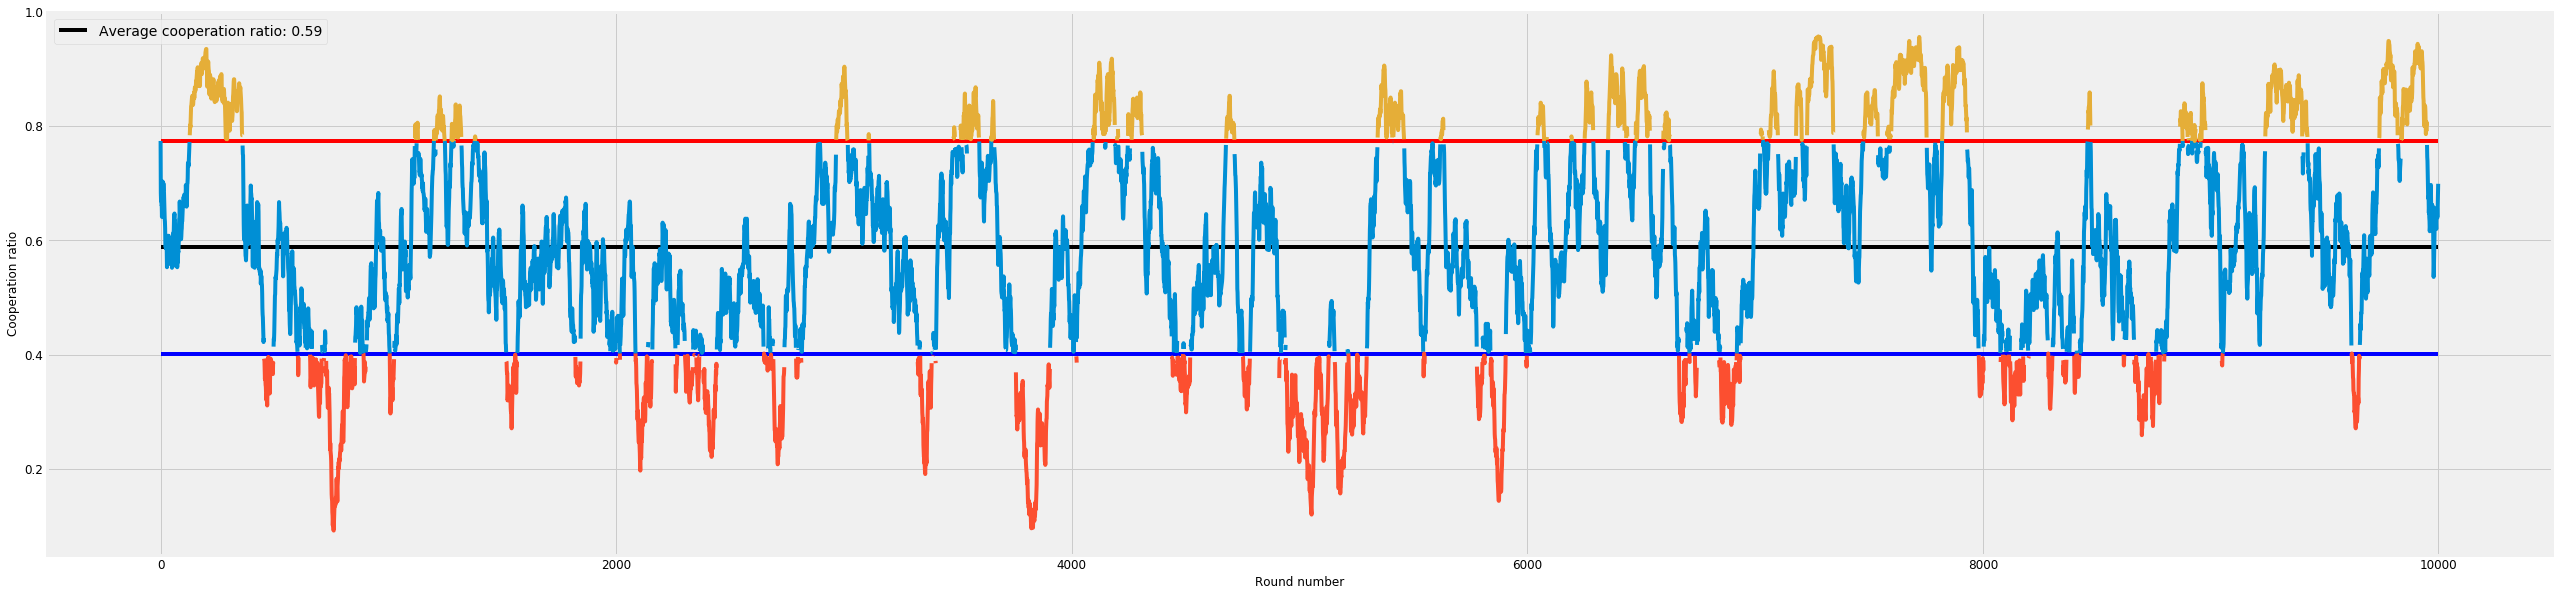

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "complete_heterogeneity", seed = str(seed))